# About Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Load Libraries and Dataset
## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import scipy.stats as stats
import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\pyproj\__init__.py:73: UserWarning:

Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.

PROJ: proj_create_from_database: Cannot find proj.db


## Load Dataset

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv("../data/01_raw/diagnostic.csv")
data = data.drop(["Unnamed: 32"], axis=1)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Understanding
## Check Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Check Duplicates

In [4]:
data.duplicated().sum()

0

## Check Missing Values

<AxesSubplot: >

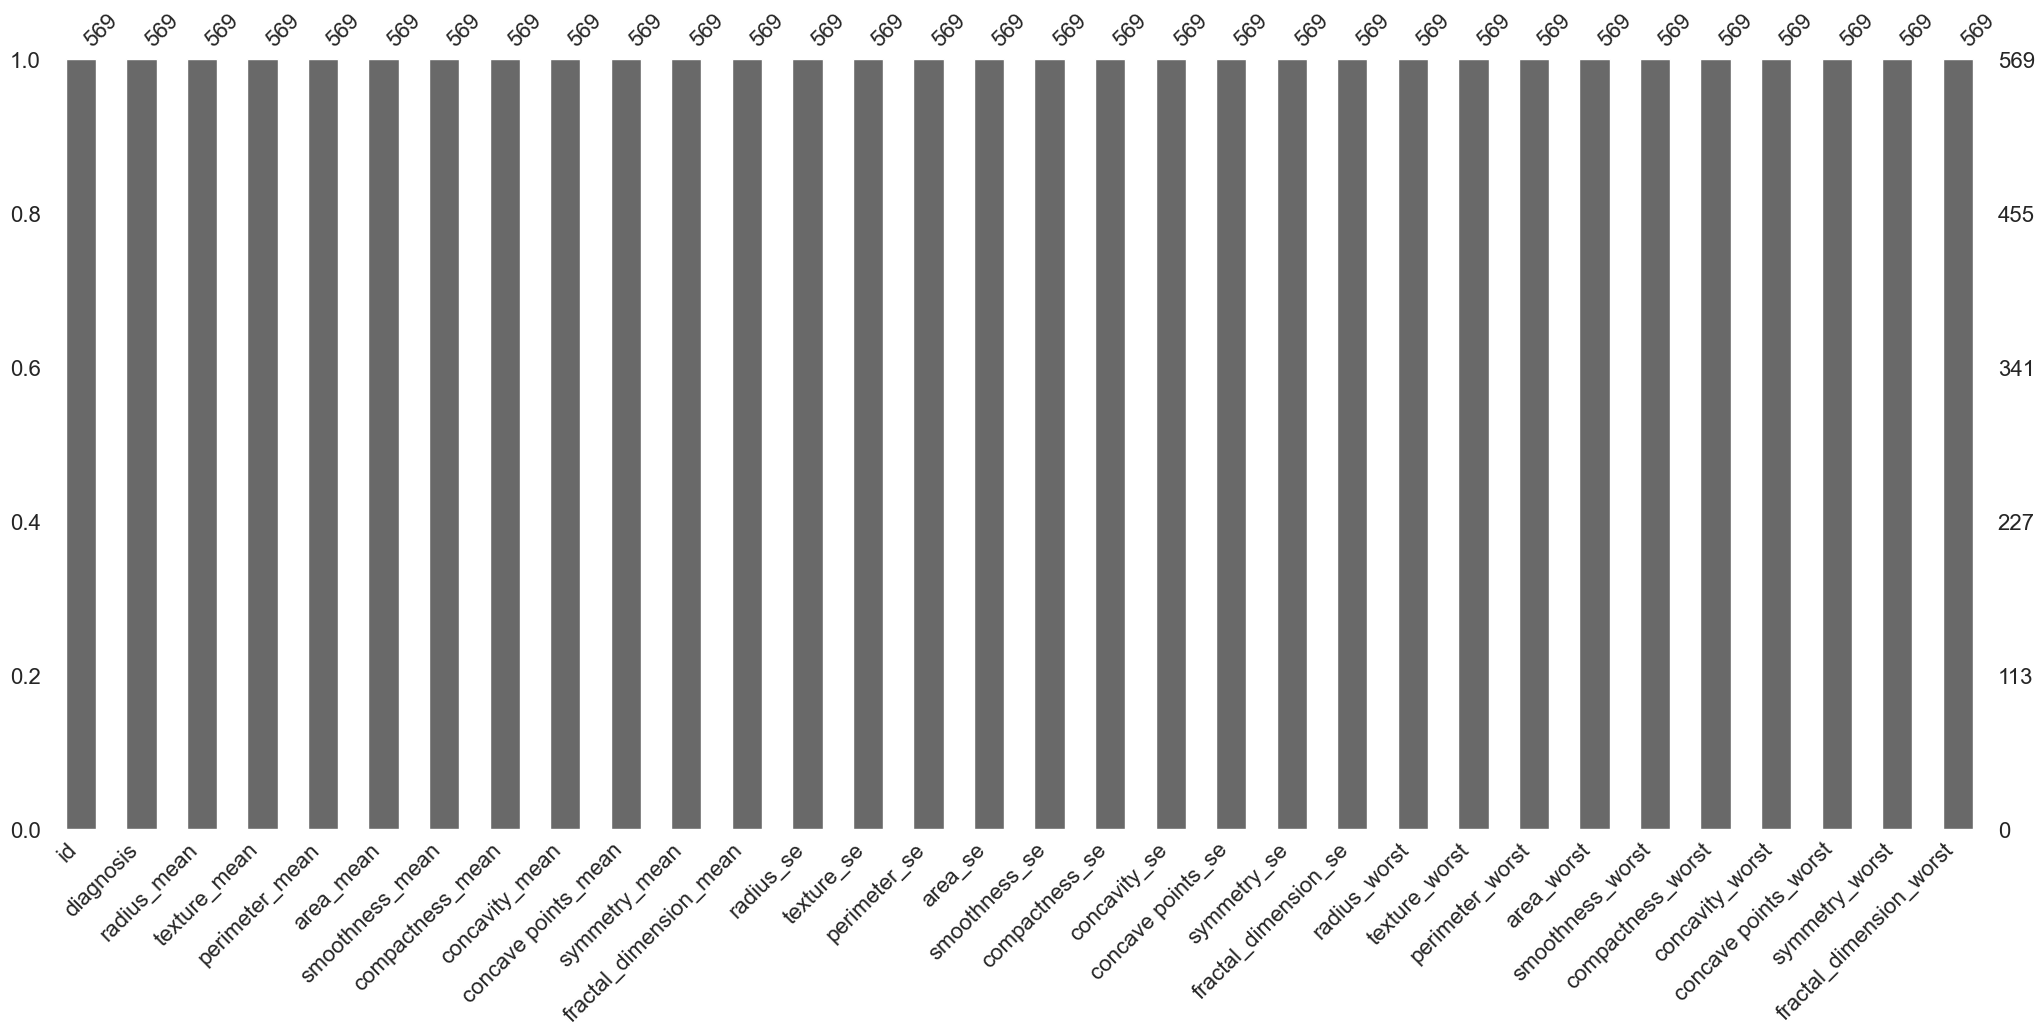

In [5]:
missingno.bar(data)

## Summary Data

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df = data.copy()

# Exploratory Data Analysis
## Univariate Analysis
### Proportion Benign and Malignant

In [8]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

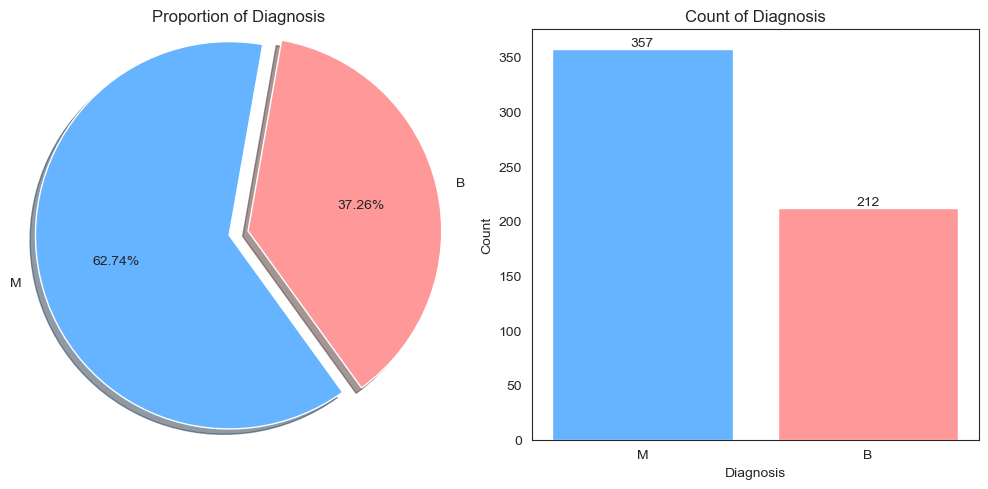

In [9]:
# Data for the plots
labels = ['M', 'B']
churn_data = df["diagnosis"].value_counts()
my_colors = ['#66b3ff', '#ff9999']

# Creating the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the pie chart on the first subplot (ax1)
my_explode = (0, 0.1)
ax1.pie(churn_data, labels=labels, autopct='%.2f%%', startangle=80, shadow=True, colors=my_colors, explode=my_explode)
ax1.set_title('Proportion of Diagnosis')
ax1.axis('equal')

# Plotting the bar chart on the second subplot (ax2)
bars = ax2.bar(labels, churn_data, color=my_colors)
ax2.set_title('Count of Diagnosis')
ax2.set_xlabel('Diagnosis')
ax2.set_ylabel('Count')

# Adding annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()

### Features Distribution

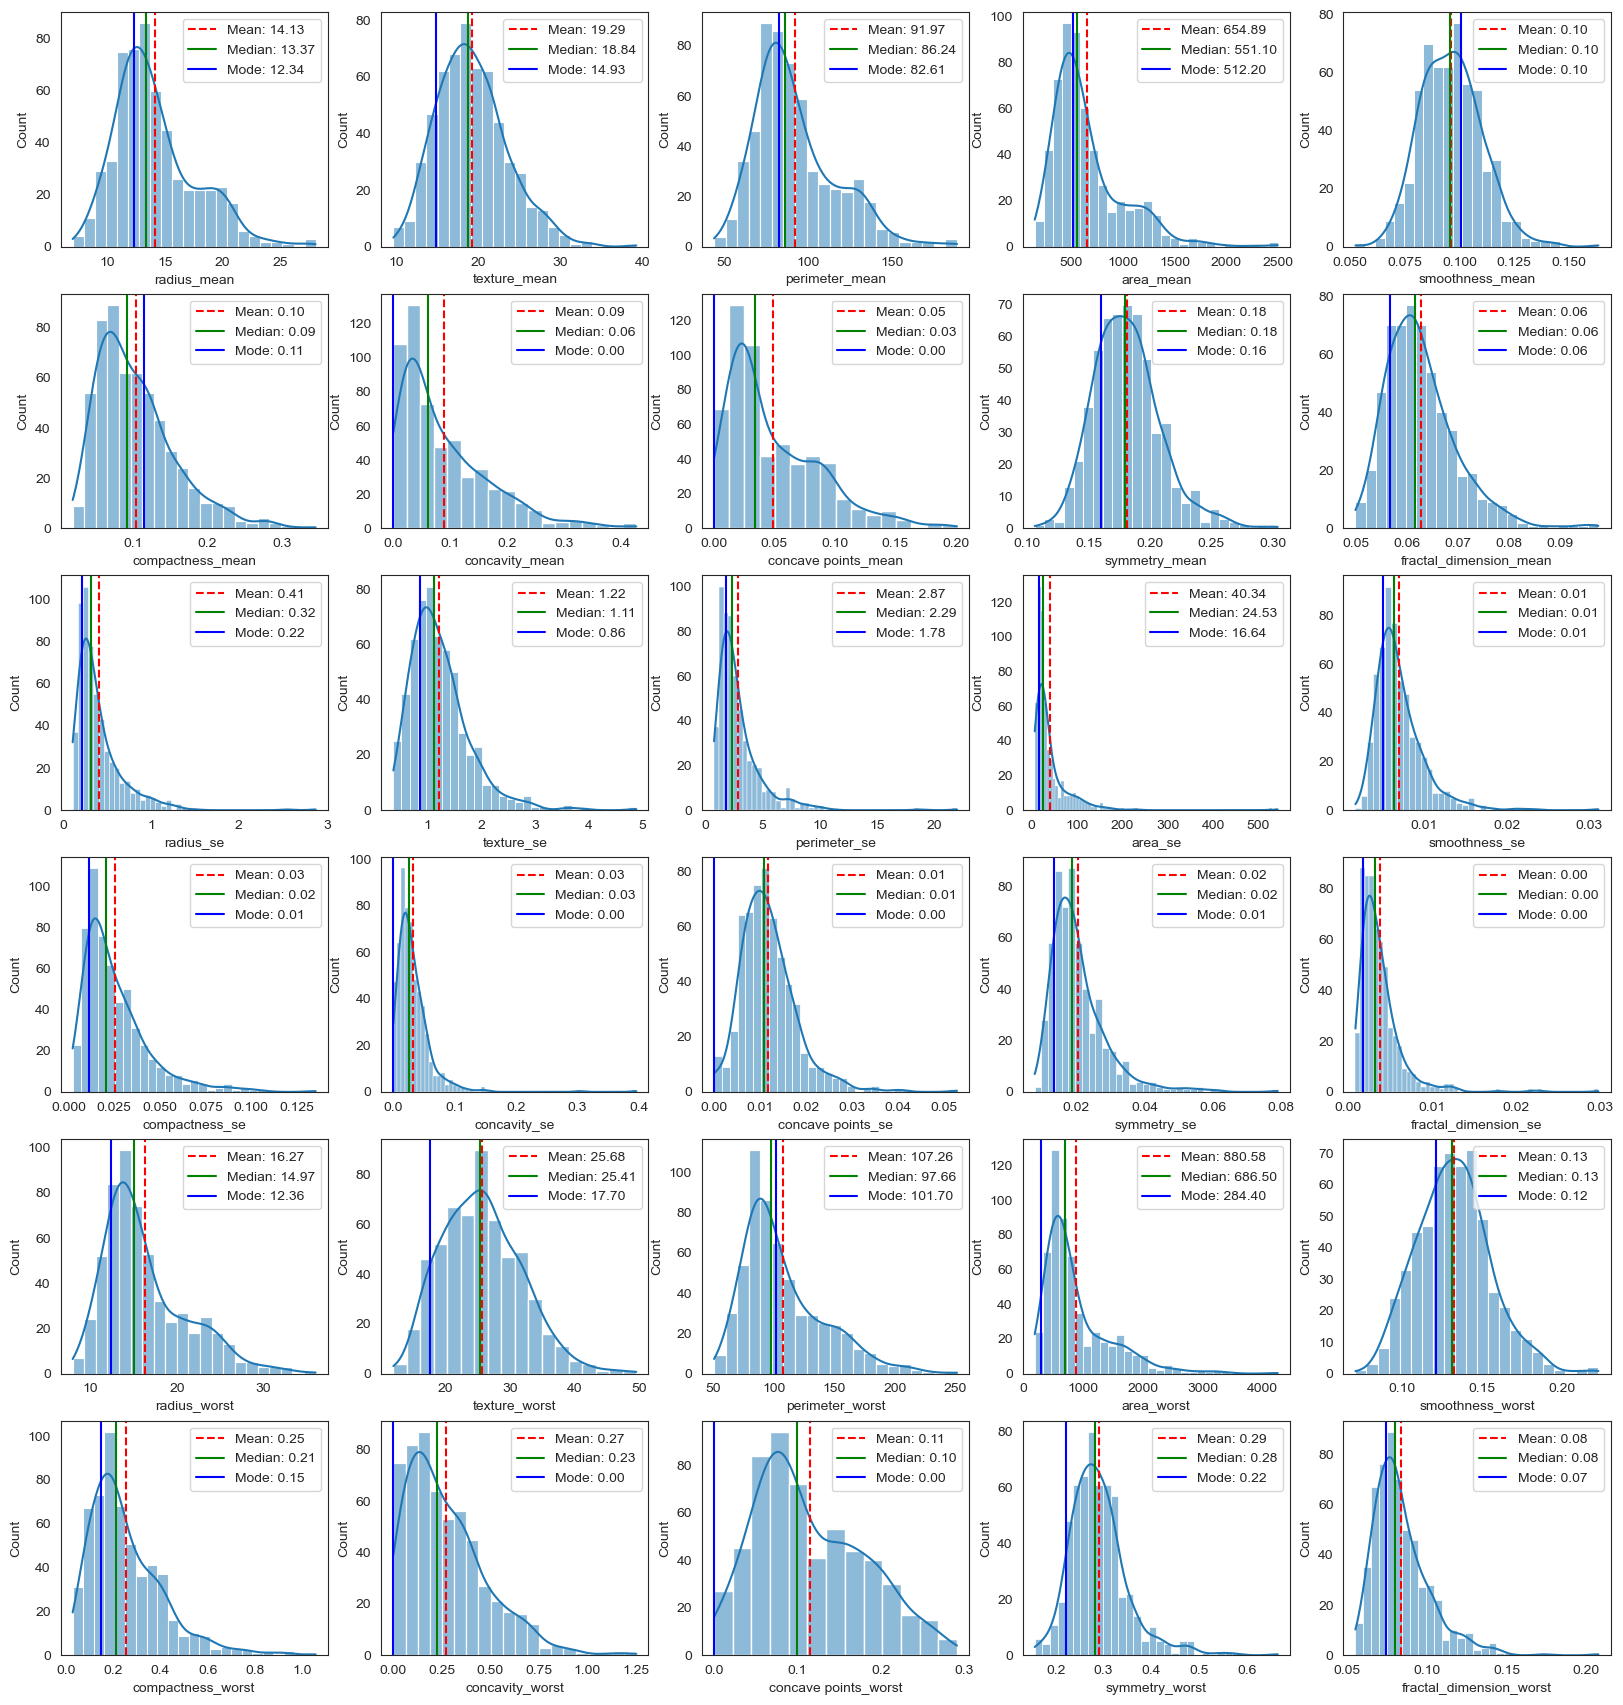

In [10]:
# Get the column names
columns = df.drop(["id", "diagnosis"], axis=1).columns

# Set the number of rows and columns in the subplot grid
nrows = 7
ncols = 5

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axs[i], kde=True)
    
    # Calculate mean, median, mode and standard deviation
    mu = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().get(0, np.nan)
    sigma = df[col].std()

    # Add vertical lines for mean, median and mode
    axs[i].axvline(mu, color='r', linestyle='--', label=f'Mean: {mu:.2f}')
    axs[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    axs[i].axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')
    
    # Add legend
    axs[i].legend()

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Features Distribution (hue= diagnosis)

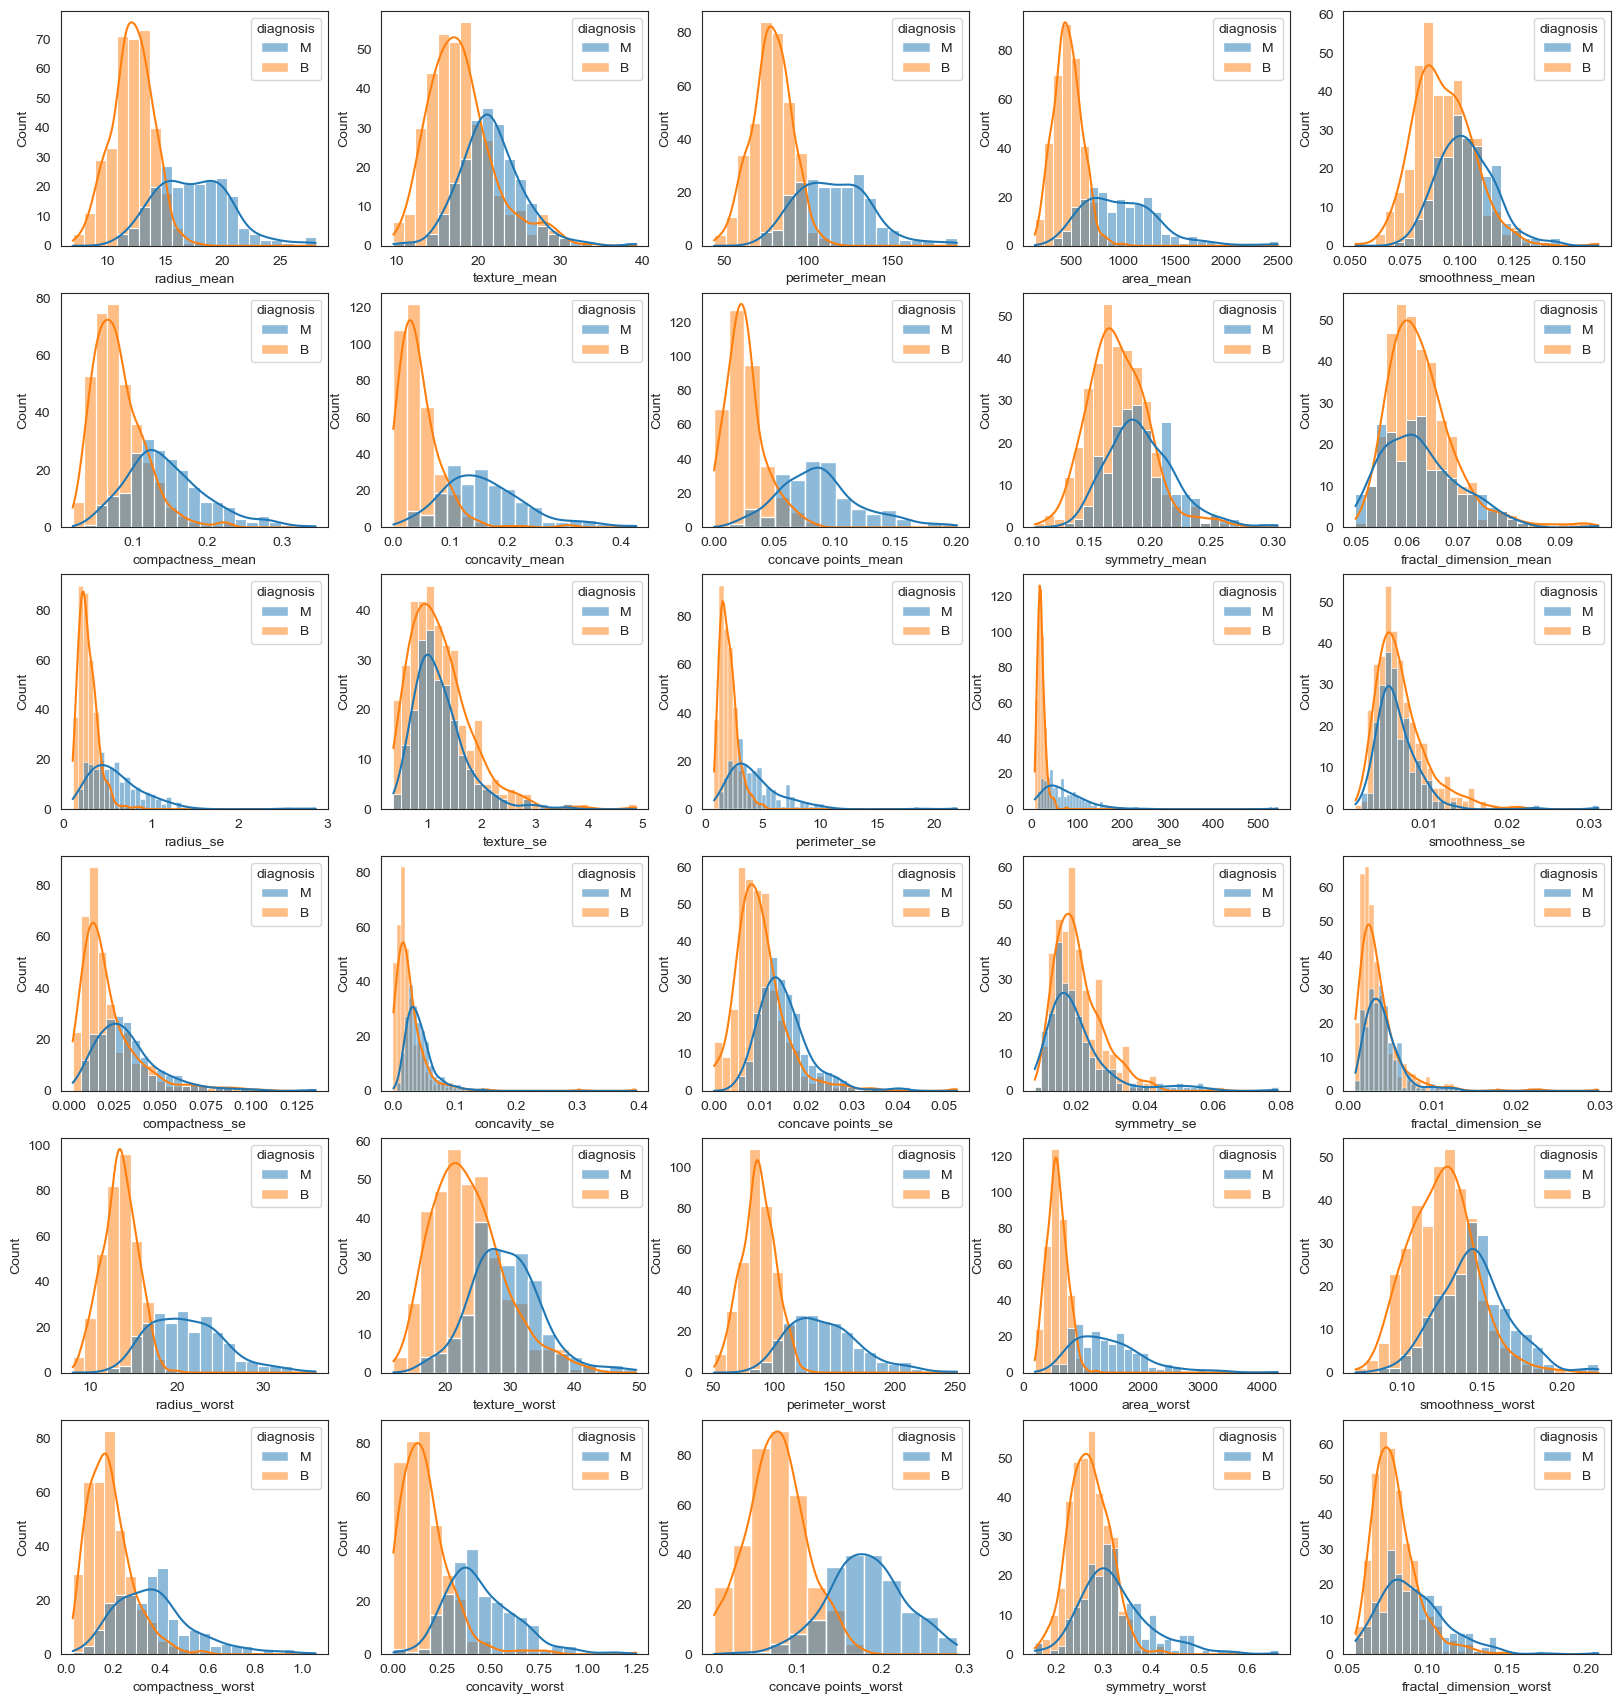

In [11]:
# Set the number of rows and columns in the subplot grid
nrows = 7
ncols = 5

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axs[i], hue="diagnosis", kde=True)

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Outlier Detection
#### Box Plot

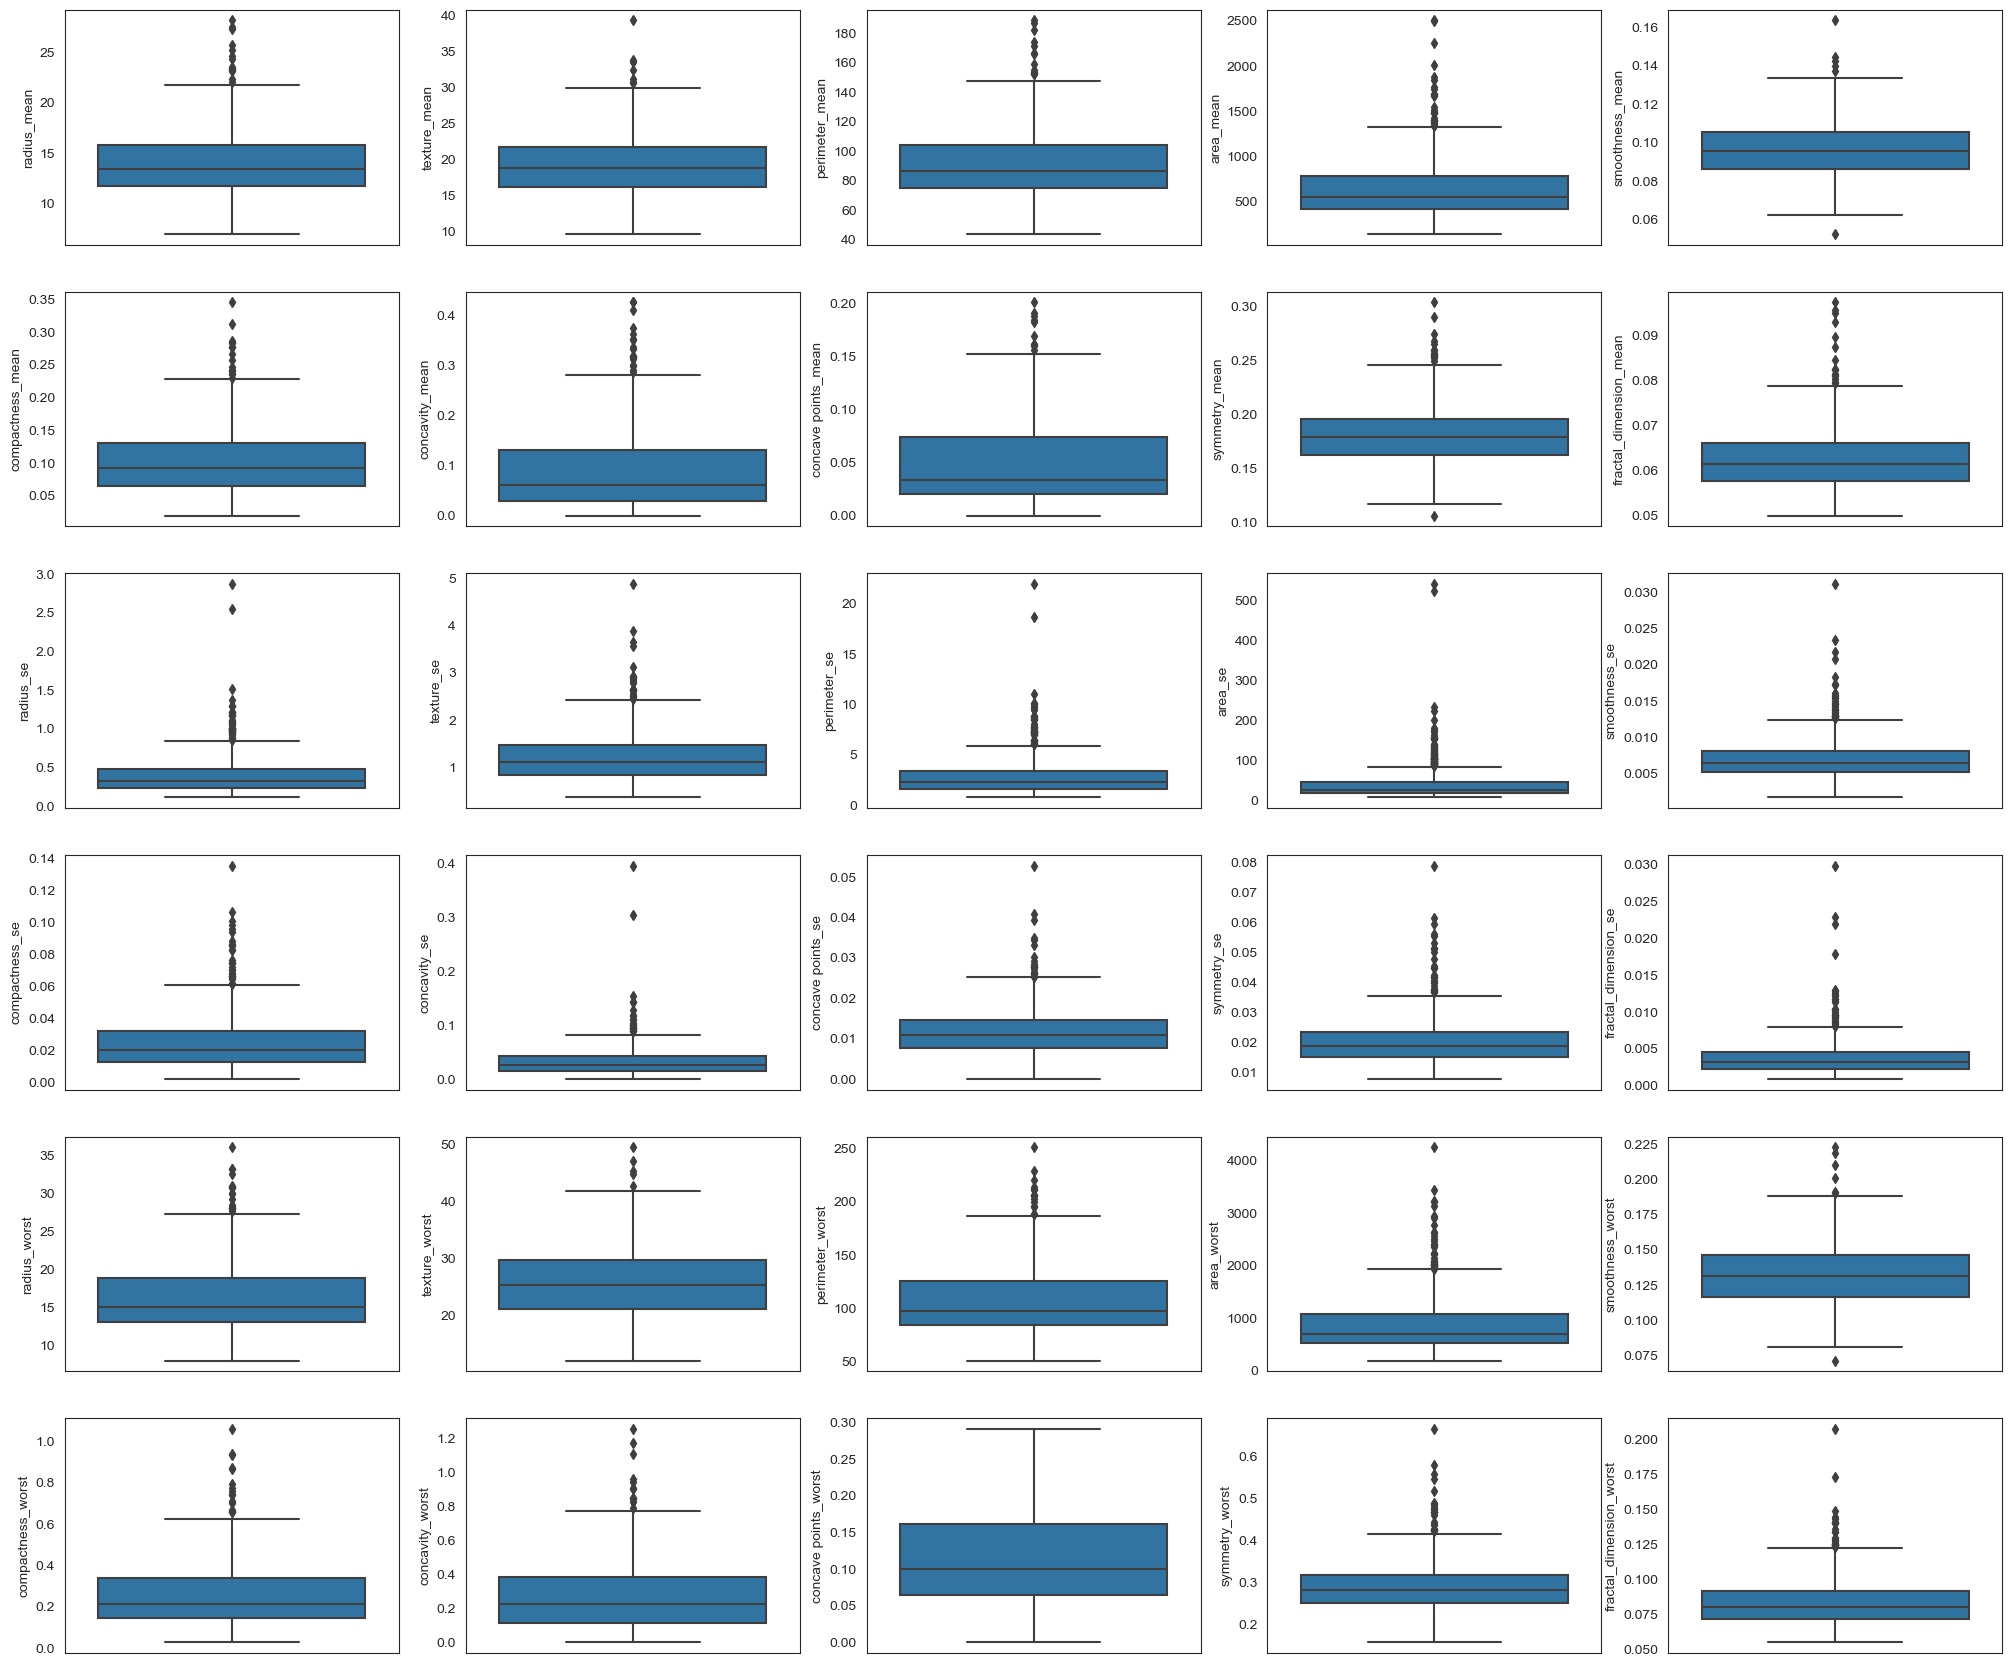

In [12]:
# Set the number of rows and columns in the subplot grid
nrows = 7
ncols = 5

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

#### IQR

In [13]:
# check for outliers
for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)].values
    print(f"{column}: {len(df[column][(df[column] < lower_bound) | (df[column] > upper_bound)])} outliers ({lower_bound} as lower bound and {upper_bound} as upper bound)")
    print(f"\n{outliers}\n")

radius_mean: 14 outliers (5.579999999999999 as lower bound and 21.9 as upper bound)

[25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]

texture_mean: 7 outliers (7.725000000000003 as lower bound and 30.244999999999997 as upper bound)

[32.47 33.81 39.28 33.56 31.12 30.72 30.62]

perimeter_mean: 13 outliers (31.775000000000013 as lower bound and 147.49499999999998 as upper bound)

[171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]

area_mean: 25 outliers (-123.30000000000001 as lower bound and 1326.3000000000002 as upper bound)

[1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]

smoothness_mean: 6 outliers (0.057975 as lower bound and 0.133695 as upper bound)

[0.1425  0.1398  0.1447  0.1634  0.1371  0.05263]

compactness_mean: 16 outliers (-0.03329999999999997 as lower bound and 0.22861999999999996 as upper bound)

[0

## Correlation Heatmap

C:\Users\fahmi\AppData\Local\Temp\ipykernel_68188\966233879.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

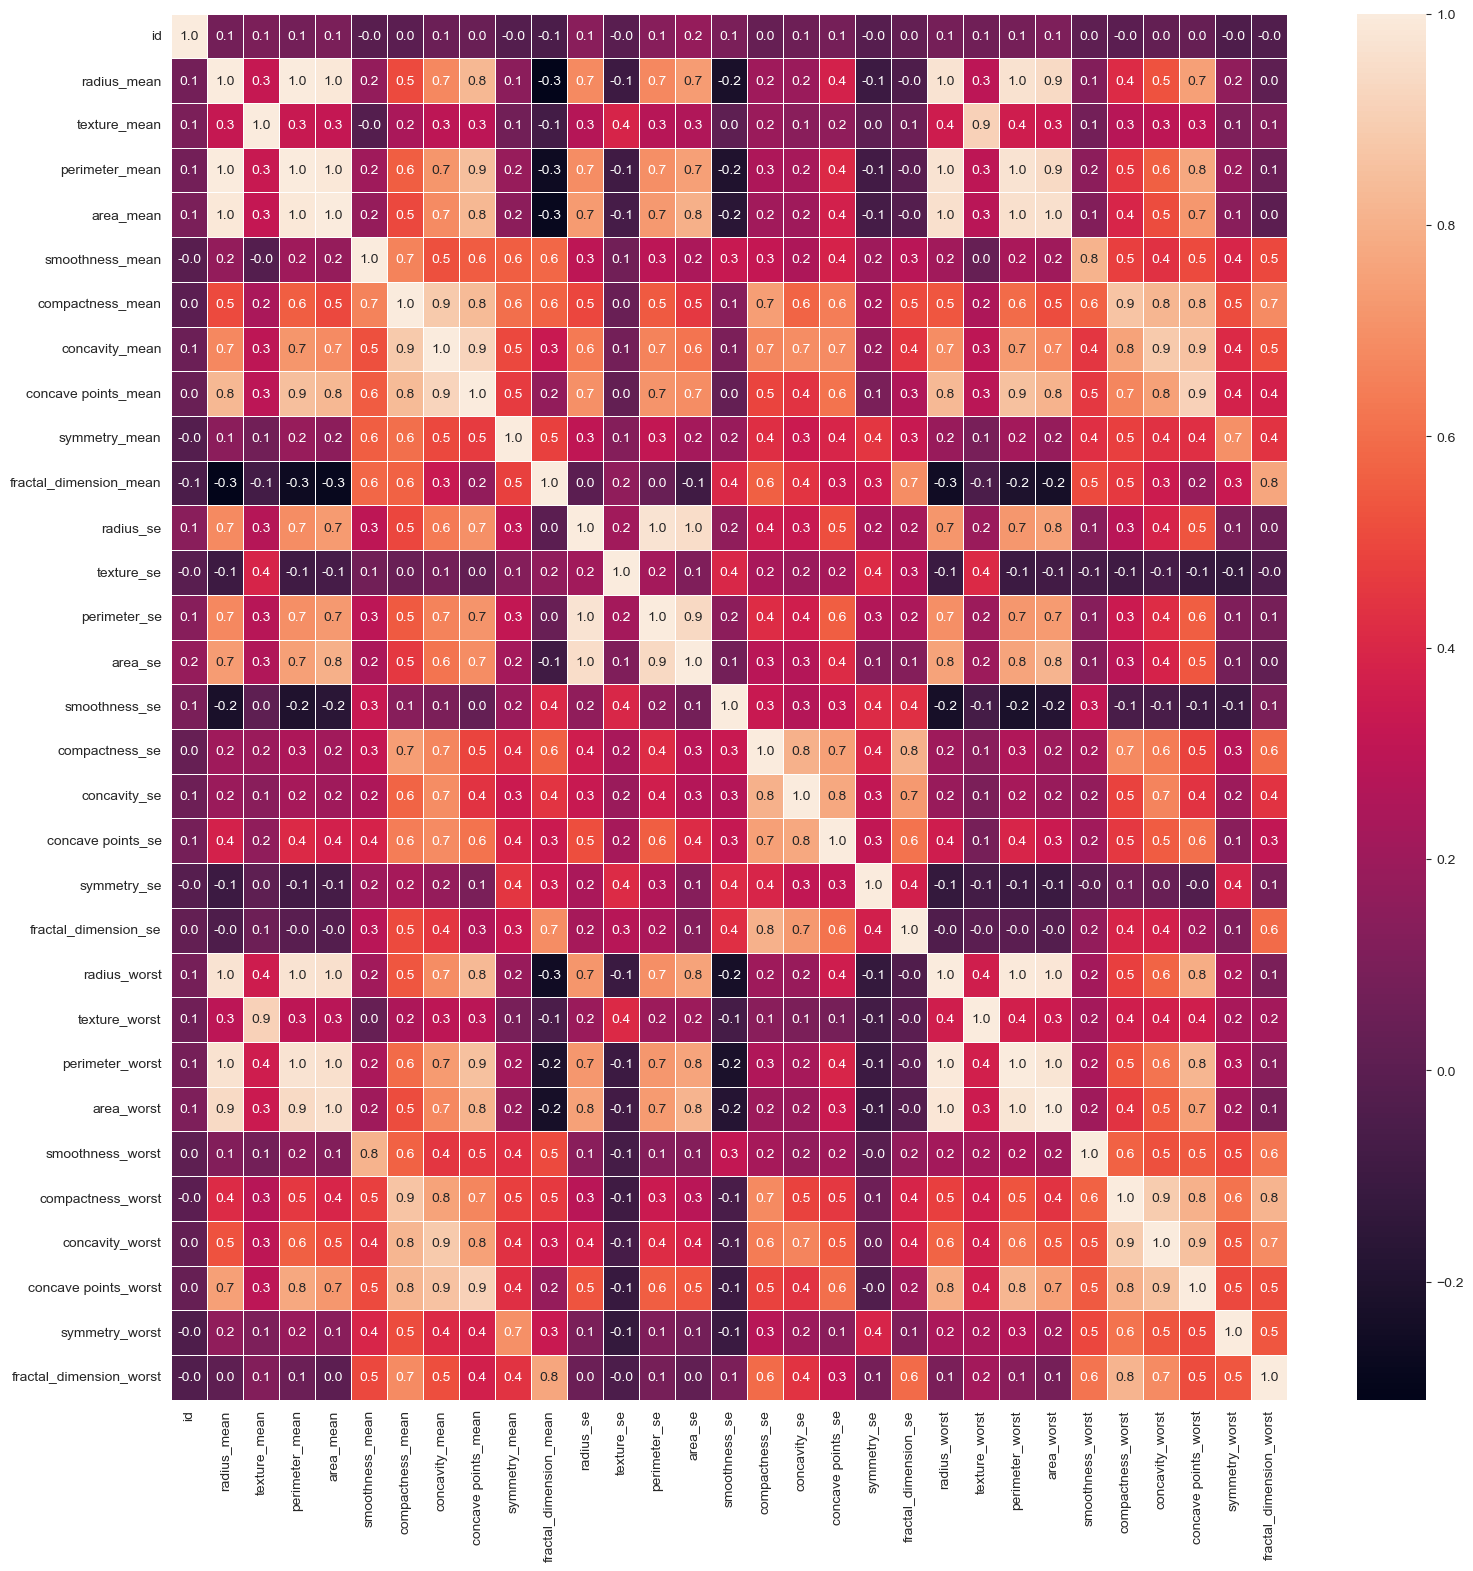

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Chi-Squared

In [15]:
def check_categorical_relationship(data, feature1, feature2):
    # Null Hypothesis (H0): There is no relationship between feature1 and feature2
    # Alternative Hypothesis (H1): There is a relationship between feature1 and feature2
    
    # Chi-square Test of Independence
    contingency_table = pd.crosstab(data[feature1], data[feature2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square Test of Independence between {feature1} and {feature2}:")
    print(f"  - Chi-square Statistic: {chi2}")
    print(f"  - P-value: {p}")
    
    if p < 0.05:
        print(f"  - Decision: Reject H0. There is a statistically significant relationship between {feature1} and {feature2}.")
    else:
        print(f"  - Decision: Fail to reject H0. There is no statistically significant relationship between {feature1} and {feature2}.")

    # Cramér's V
    cramers_v = np.sqrt(chi2 / (data.shape[0]*(min(contingency_table.shape)-1)))
    print(f"\nCramér's V for {feature2}: {cramers_v}")
    
    if cramers_v < 0.1:
        print(f"The association between {feature1} and {feature2} is very weak.")
    elif cramers_v < 0.3:
        print(f"The association between {feature1} and {feature2} is weak.")
    elif cramers_v < 0.5:
        print(f"The association between {feature1} and {feature2} is moderate.")
    else:
        print(f"The association between {feature1} and {feature2} is strong.")
        
    print("*"*100)
    
    return cramers_v

In [16]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in df.drop('diagnosis', axis=1).columns:
    value = check_categorical_relationship(df, "diagnosis", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between diagnosis and id:
  - Chi-square Statistic: 569.0
  - P-value: 0.480288064740988
  - Decision: Fail to reject H0. There is no statistically significant relationship between diagnosis and id.

Cramér's V for id: 1.0
The association between diagnosis and id is strong.
****************************************************************************************************

Chi-square Test of Independence between diagnosis and radius_mean:
  - Chi-square Statistic: 513.7450859274527
  - P-value: 0.029296084732761095
  - Decision: Reject H0. There is a statistically significant relationship between diagnosis and radius_mean.

Cramér's V for radius_mean: 0.9502058660741416
The association between diagnosis and radius_mean is strong.
****************************************************************************************************

Chi-square Test of Independence between diagnosis and texture_mean:
  - Chi-square Statistic: 498.4163033137783
  - P-value:


Chi-square Test of Independence between diagnosis and concave points_se:
  - Chi-square Statistic: 511.9626693444674
  - P-value: 0.4177543839019003
  - Decision: Fail to reject H0. There is no statistically significant relationship between diagnosis and concave points_se.

Cramér's V for concave points_se: 0.9485560845815093
The association between diagnosis and concave points_se is strong.
****************************************************************************************************

Chi-square Test of Independence between diagnosis and symmetry_se:
  - Chi-square Statistic: 487.721803815866
  - P-value: 0.6083255561888706
  - Decision: Fail to reject H0. There is no statistically significant relationship between diagnosis and symmetry_se.

Cramér's V for symmetry_se: 0.9258272354900562
The association between diagnosis and symmetry_se is strong.
****************************************************************************************************

Chi-square Test of Independenc

In [17]:
corr = pd.DataFrame(corr_values)
corr.set_index("columns").sort_values(by="value", ascending=False)

,value
columns,
id,1.000000
concave points_mean,0.994345
concavity_mean,0.990558
area_worst,0.990558
smoothness_se,0.990558
radius_se,0.989925
perimeter_se,0.988659
concavity_worst,0.988025
area_mean,0.986756


## Bivariate Analysis
### Positive Correlated Features

In [52]:
# 2 datasets
M = data[(data['diagnosis'] == "M")]
B = data[(data['diagnosis'] == "B")]

def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [53]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

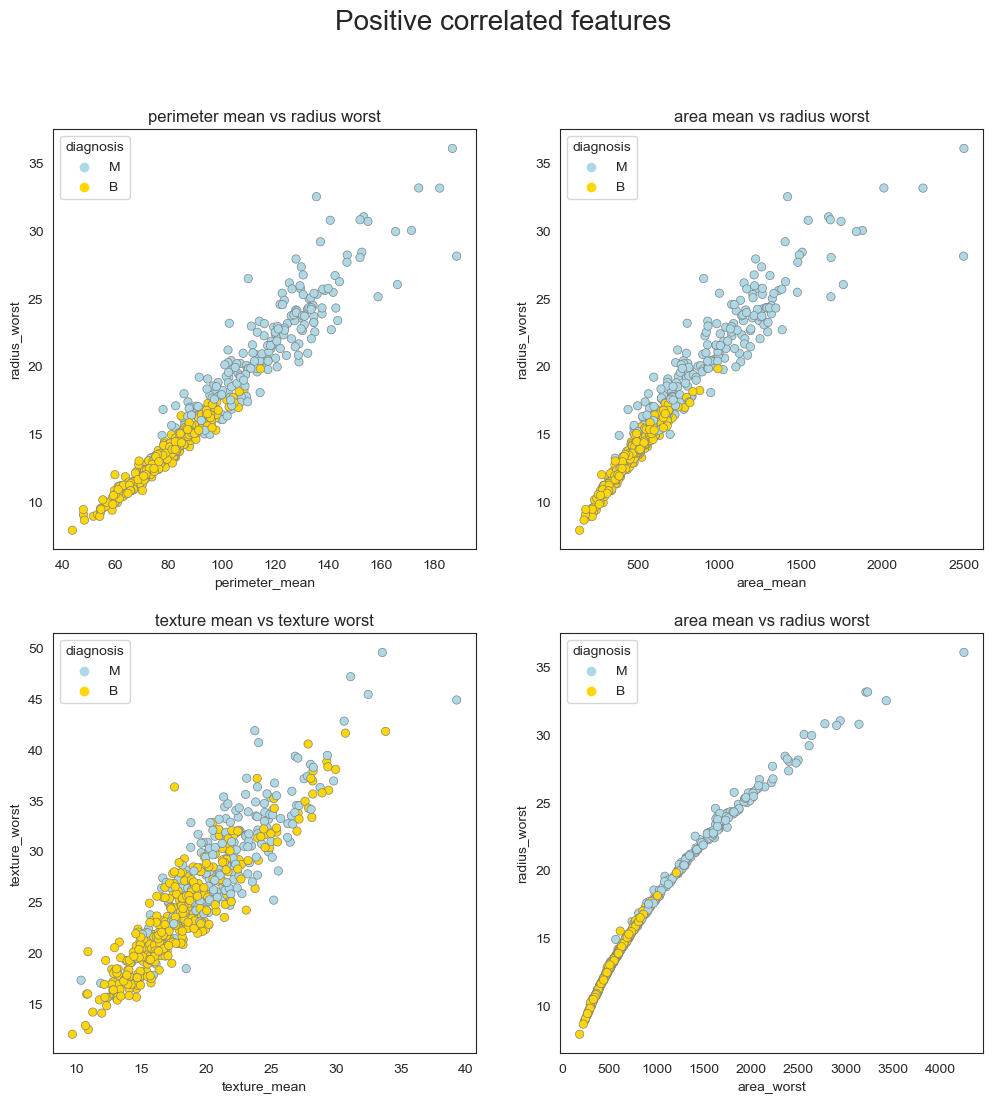

In [27]:
palette ={"M" : 'lightblue', "B" : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
# plt.savefig('1')
plt.show()

### Uncorrelated Features

In [54]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

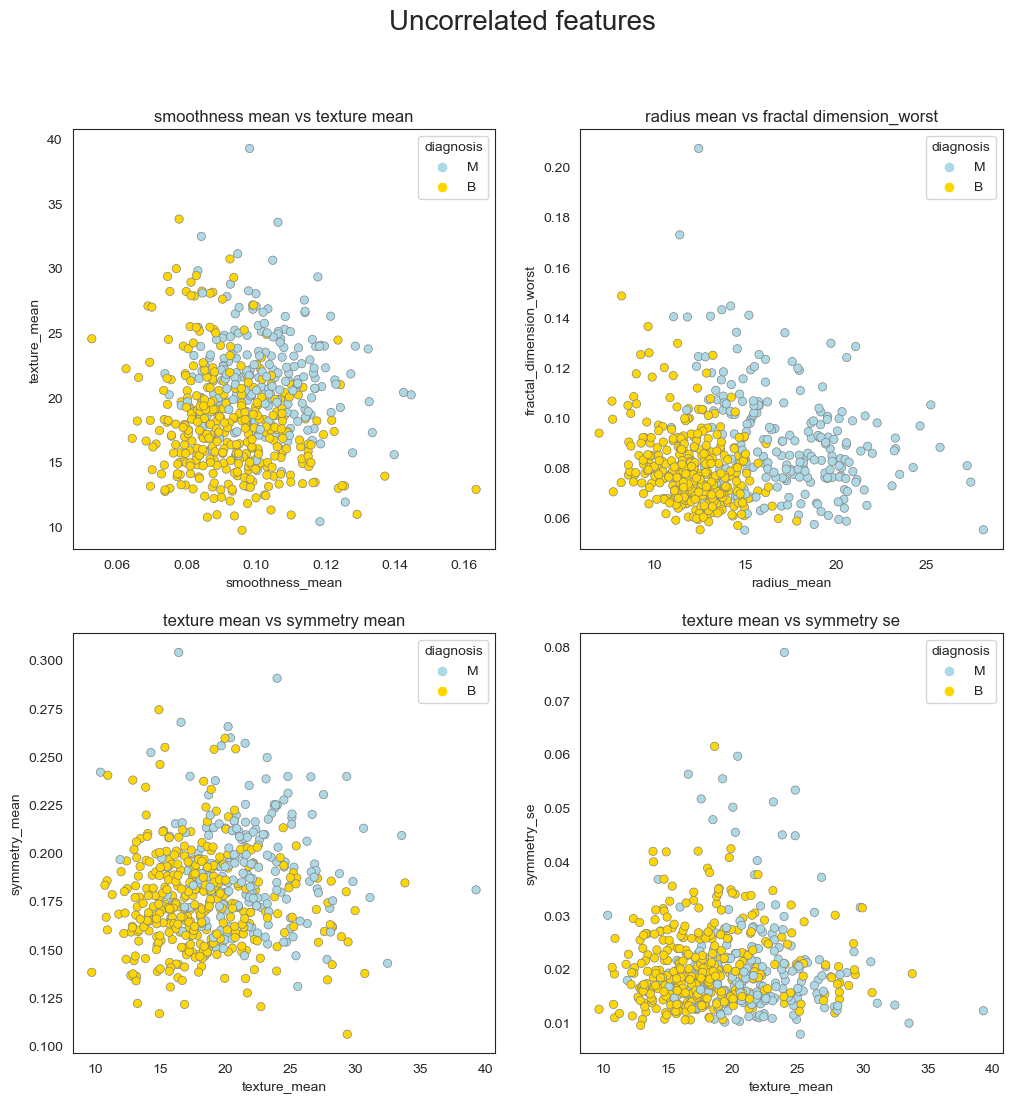

In [35]:
# seaborn version : 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

### Negative Correlated Features

In [55]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

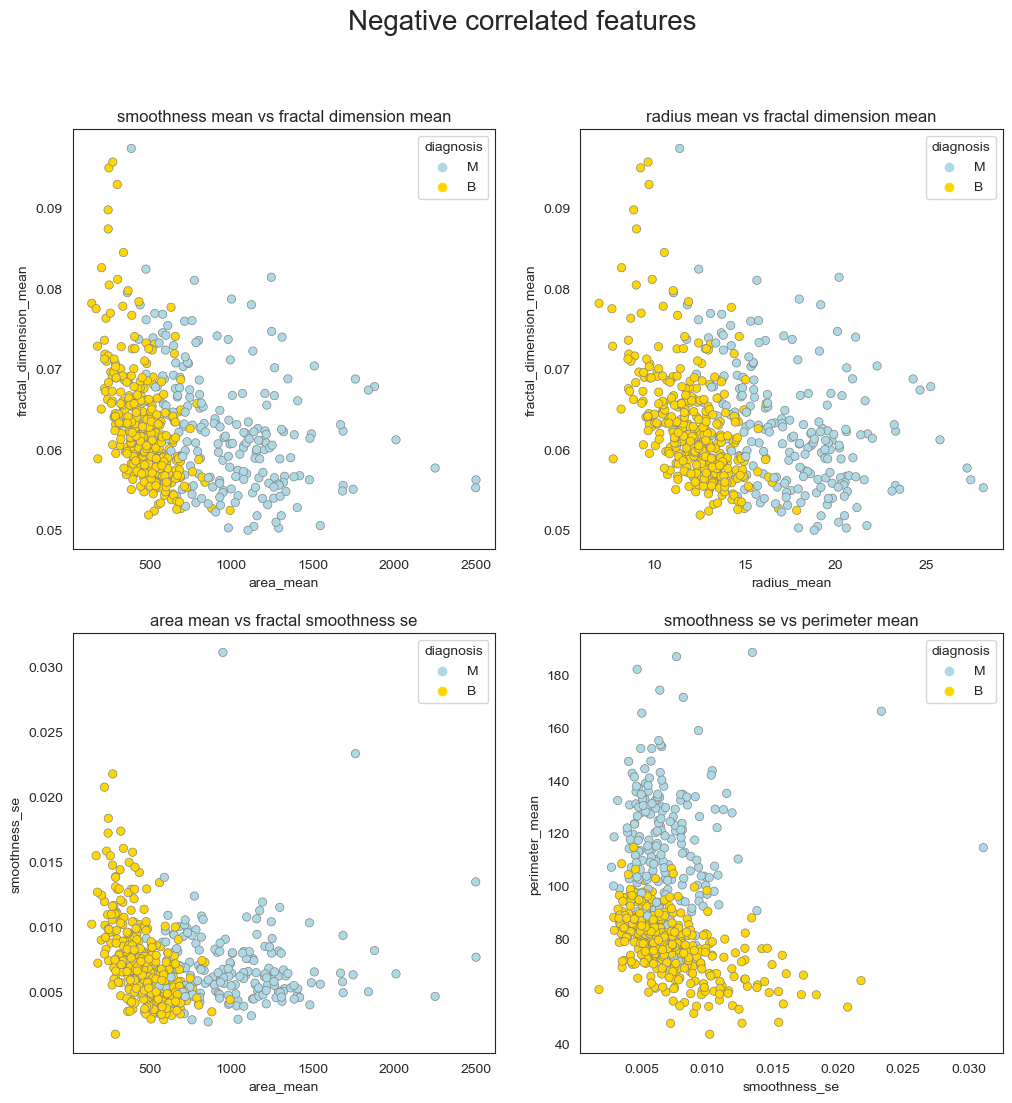

In [37]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()